In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import imageio
import math
%matplotlib inline

Use the same grid as in Astar problem. Assume there is no graph available. Use RRT/ RRT* to sample paths, build a graph and find the shortest path

Make a gif of the path evolution




In [6]:
# write the Euclidean function that takes in the
# node x, y and compute the distance
def euclidean(node1, node2):
  x1, y1 = node1
  x2, y2 = node2
  return np.sqrt((x1-x2)**2+(y1-y2)**2)

In [7]:
# ref in the following link
# https://github.com/mouad-boumediene/python-visualization-of-the-RRT-algorithm-with-pygame/blob/main/RRTbasePy.py
class RRT_graph(object):
  def __init__(self,grid,start,goal):
    self.grid = grid
    self.grid_size_x = grid.shape[0]
    self.grid_size_y = grid.shape[1]
    self.x = []
    self.y = []
    self.tree_ref = []
    self.x.append(start[0])
    self.y.append(start[1])
    self.tree_ref.append(0)
    self.start = start
    self.goal = goal
    self.goal_state = 1000
    self.goal_flag = False

  def plot_step(self):
    fig, ax = plt.subplots(figsize=(12,12))
    ax.imshow(self.grid, cmap=plt.cm.Dark2)
    ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 300)
    ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 300)
    for i in range(1,self.number_of_tree_nodes()):
      ax.scatter(self.y[i],self.x[i], marker = "o", color = "blue", s = 100)
      ax.plot([self.y[i], self.y[self.tree_ref[i]]],[self.x[i], self.x[self.tree_ref[i]]],'black')
    if self.goal_flag:
      i = self.number_of_tree_nodes()-1
      while i != 0:
        ax.scatter(self.y[i],self.x[i], marker = "o", color = "yellow", s = 100)
        ax.plot([self.y[i], self.y[self.tree_ref[i]]],[self.x[i], self.x[self.tree_ref[i]]],'red')  
        i = self.tree_ref[i]

  def draw_tree(self):
    pass
    # plt.show()

  def generate_node(self):
    x = np.random.randint(0,self.grid_size_x)
    y = np.random.randint(0,self.grid_size_y)
    return (x,y)

  def lying_on_wall(self,node):
    (x,y) = (self.x[node],self.y[node])
    if self.grid[x,y] == 1:
      return True
    else:
      return False

  def passing_through_wall(self,node1,node2):
    (x1,y1) = (self.x[node1],self.y[node1])
    (x2,y2) = (self.x[node2],self.y[node2])
    min_x = min(x1,x2)
    max_x = max(x1,x2)
    min_y = min(y1,y2)
    max_y = max(y1,y2)
    for i in range(min_x,max_x+1):
      for j in range(min_y,max_y+1):
        if self.grid[i,j] == 1:
          return True
    return False

  def add_node(self,node,node_coord):
    self.x.insert(node,node_coord[0])
    self.y.insert(node,node_coord[1])

  def remove_node(self, node):
    self.x.pop(node)
    self.y.pop(node)

  def add_edge(self, parent_node, child_node):
    self.tree_ref.insert(child_node,parent_node)
    # print(self.x)
    # print(self.y)
    # print(self.tree_ref)

  def remove_edge(self, node):
    self.tree_ref.pop(node)

  def number_of_tree_nodes(self):
    return len(self.x)

  def distance(self, node1, node2):
    (x1,y1) = (self.x[node1],self.y[node1])
    (x2,y2) = (self.x[node2],self.y[node2])
    return euclidean((x1,y1),(x2,y2))
  
  def connect(self, node1, node2):
    if self.passing_through_wall(node1, node2):
      self.remove_node(node2)
      return False
    else:
      self.add_edge(node1, node2)
      self.check_goal_state()
      self.plot_step()
      return True

  def nearest_node(self, node):
    dmin = self.distance(0, node)
    nnear = 0
    for i in range(0, node):
      if self.distance(i, node) < dmin:
        dmin = self.distance(i, node)
        nnear = i
    return nnear

  def step(self, nnear, nrand, dmax=5):
    d = self.distance(nnear, nrand)
    if d > dmax:
      u = dmax / d
      (xnear, ynear) = (self.x[nnear], self.y[nnear])
      (xrand, yrand) = (self.x[nrand], self.y[nrand])
      (px, py) = (xrand - xnear, yrand - ynear)
      theta = np.arctan2(py, px)
      (x, y) = (int(xnear + dmax * np.cos(theta)),
                int(ynear + dmax * np.sin(theta)))
      self.remove_node(nrand)
      self.add_node(nrand, (x, y))
    # self.check_goal_state()

  def check_goal_state(self,goal_rad = 1):
    n = self.number_of_tree_nodes()
    if abs(self.x[n-1] - self.goal[0]) <= goal_rad and abs(self.y[n-1] - self.goal[1]) <= goal_rad:
      self.goal_state = n
      self.goal_flag = True

  def expand(self):
    n = self.number_of_tree_nodes()
    n_coord = self.generate_node()
    self.add_node(n, n_coord)
    plot_flag = False
    if not self.lying_on_wall(n):
      nearest_node = self.nearest_node(n)
      self.step(nearest_node, n)
      plot_flag = self.connect(nearest_node, n)
    else:
      self.remove_node(n)
    return plot_flag

  def bias(self):
    n = self.number_of_tree_nodes()
    self.add_node(n, self.goal)
    plot_flag = False
    if not self.lying_on_wall(n):
      nearest_node = self.nearest_node(n)
      self.step(nearest_node, n)
      plot_flag = self.connect(nearest_node, n)
    else:
      self.remove_node(n)
    return plot_flag

In [9]:
# RRT on a 40 by 40 environment with no obstacles
grid1 = np.zeros([40,40])
start = (0,1)
goal = (10,15)
G = RRT_graph(grid1,start,goal)
filenames = []
bias = 10
i = 0
while not G.goal_flag:
  plot_flag = 0
  if i%5 != 0:
    plot_flag = G.expand()
  else:
    plot_flag = G.bias()
  if plot_flag:
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)

    # save frame[]
    plt.savefig(filename)
    plt.close()
  i+= 1
      
# build gif ref below
# https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30
with imageio.get_writer('mygif_blank.gif', mode='I') as writer:
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)


In [10]:
# arena from movingai ref
# https://movingai.com/benchmarks/dao/index.html
data = np.loadtxt("arena.map", skiprows=4, dtype='str')
data_header = np.loadtxt("arena.map", skiprows=1, max_rows = 2, dtype = 'str')
data_size = [int(data_header[0][1]), int(data_header[1][1])]
grid = np.zeros(data_size)
for i in range(data_size[0]):
  for j in range(data_size[1]):
    if data[i][j] != '.':
      grid[i,j] = 1

start = (4,13)
goal = (36,38)
G = RRT_graph(grid,start,goal)
filenames = []
bias = 10
i = 0
while not G.goal_flag:
  plot_flag = 0
  if i%5 != 0:
    plot_flag = G.expand()
  else:
    plot_flag = G.bias()
  if plot_flag:
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)

    # save frame[]
    plt.savefig(filename)
    plt.close()
  i+= 1
      
# build gif ref below
# https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30
with imageio.get_writer('arena.gif', mode='I') as writer:
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

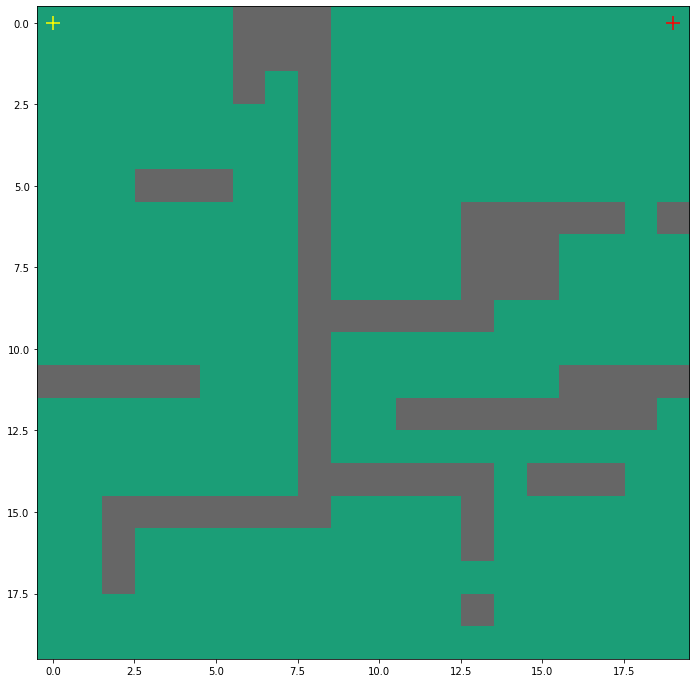

In [3]:
# use np.load to load a grid of 1s and 0s
# 1 - occupied 0- free
grid = np.load("astar_grid.npy")
# you can define your own start/ end
start = (0, 0)
goal = (0, 19)

# visualize the start/ end and the robot's environment
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "+", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "+", color = "red", s = 200)
plt.show()

In [ ]:
# #test code
# G = RRT_graph(grid,start,goal)
# filenames = []
# for i in range(300):
#   node_coord = G.generate_node()
#   num = G.number_of_tree_nodes()
#   G.add_node(num,node_coord)
#   if G.connect(num-1,num):
#     # create file name and append it to a list
#     filename = f'{i}.png'
#     filenames.append(filename)

#     # save frame
#     plt.savefig(filename)
#     plt.close()

# # build gif
# with imageio.get_writer('mygif.gif', mode='I') as writer:
#   for filename in filenames:
#     image = imageio.imread(filename)
#     writer.append_data(image)

# # # Remove files
# # for filename in filenames:
# #   !rm .\filename


In [14]:
G = RRT_graph(grid,start,goal)
filenames = []
bias = 20
i = 0
while not G.goal_flag:
  plot_flag = 0
  if i%bias != 0:
    plot_flag = G.expand()
  else:
    plot_flag = G.bias()
  if plot_flag:
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)

    # save frame[]
    plt.savefig(filename)
    plt.close()
  i+= 1

# build gif
with imageio.get_writer('mygif1.gif', mode='I') as writer:
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7feabb499dd0> (for post_execute):


AttributeError: ignored

AttributeError: ignored

<Figure size 864x864 with 1 Axes>